# 문제

https://programmers.co.kr/learn/courses/30/lessons/77484
로또 6/45(이하 '로또'로 표기)는 1부터 45까지의 숫자 중 6개를 찍어서 맞히는 대표적인 복권입니다. 아래는 로또의 순위를 정하는 방식입니다. 1

순위	당첨 내용
1	6개 번호가 모두 일치

2	5개 번호가 일치

3	4개 번호가 일치

4	3개 번호가 일치

5	2개 번호가 일치

6(낙첨)	그 외



# Trial

In [66]:
def solution(lottos, win_nums):
    answer = []

    # 먼저 매치된 숫자부터 세어준다.
    match = len([i for i in lottos if i in win_nums])
    
    # 0의 갯수를 세어서 최고순위에 넣어주고, 그 다음으로 매치된 숫자를 최저순위로 넣는다..
    import collections
    
    count = collections.Counter(lottos)
    
    answer.append(str(match+count[0]))              
    answer.append(str(match))
    
    # 갯수마다의 순위를 정한 딕셔너리를 지정하고, 그 갯수에 따른 순위를 반환한다.
    rank = {'6':1,'5':2,'4':3,'3':4,'2':5,'1':6,'0':6}
    for i in range(len(answer)):
        answer[i] = rank[answer[i]]
        
    return answer
                  
                  

# 모범답안 #1

- dictionary에 key값은 정수도 쓸 수 있다.
- count()를 써서 0을 셀 수 있다. 괜히 Counter 썼다. 그래도 예전에 써먹은거 다시 기억해서 좋긴하다.

In [76]:
def solution(lottos, win_nums):

    # 먼저 매치된 숫자와 0의 숫자를 세어준다.
    match = len([i for i in lottos if i in win_nums])
    zeros=lottos.count(0)
    
    # 갯수마다의 순위를 정한 딕셔너리를 지정하고, 그 갯수에 따른 순위를 반환한다.
    rank = {6:1, 5:2, 4:3, 3:4, 2:5, 1:6, 0:6}
    # 0의 갯수를 세어서 최고순위에 넣어주고, 그 다음으로 매치된 숫자를 최저순위로 넣는다..
    answer = [rank[match+zeros],rank[match]]
    
        
    return answer
                  

In [81]:
l1=[44, 1, 0, 0, 31, 25]
win1=[31, 10, 45, 1, 6, 19]
# result = [3, 5]

l2=[0, 0, 0, 0, 0, 0]
win2=[38, 19, 20, 40, 15, 25]
# result =[1, 6]

l3=[45, 4, 35, 20, 3, 9]
win3=[20, 9, 3, 45, 4, 35]
# result=[1, 1]

l=[l1,l2,l3]
w=[win1,win2,win3]

for i,j in zip(l,w):
    print(solution(i,j))

[3, 5]
[1, 6]
[1, 1]


# 모범답안 #2

In [80]:
def solution(lottos, win_nums):
    rank = {
        0: 6,
        1: 6,
        2: 5,
        3: 4,
        4: 3,
        5: 2,
        6: 1
    }
    return [rank[len(set(lottos) & set(win_nums)) + lottos.count(0)], rank[len(set(lottos) & set(win_nums))]]

&가 있어서 찾아보니 이런게 있었다.
https://docs.python.org/2/library/sets.html

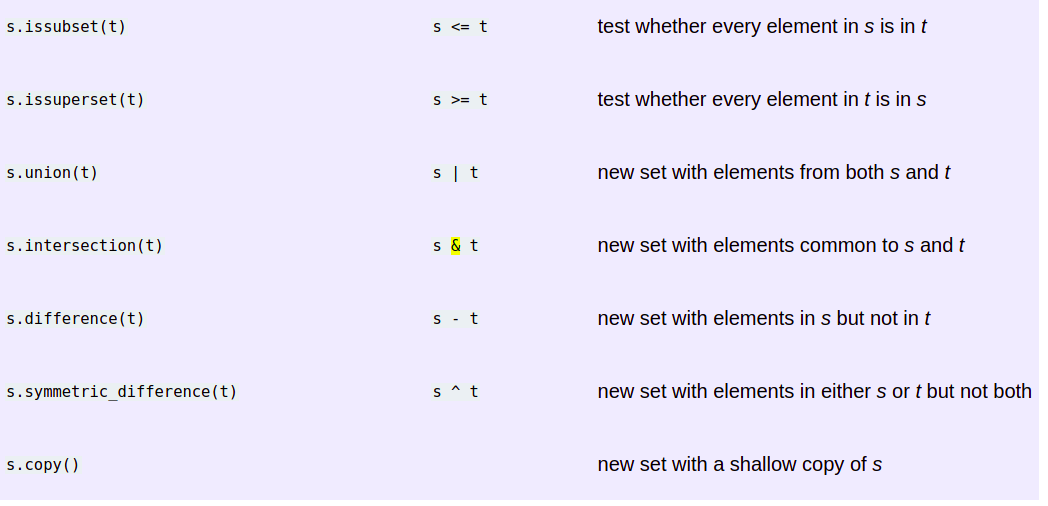

간단히 말해서 우리가 중학교때 배운 집합이랑 같다. 포함하는지 (<=.>=), 합집함(|), 교집합(&),차집합(-), 여집합(^)을 뜻한다.

# 모범답안 #3

In [82]:
def solution(lottos, win_nums):
    zero = lottos.count(0)
    a= [x for x in lottos if x in win_nums]
    max = zero+len(a)
    min = len(a)

    max = 7- max if max >=1 else 6
    min = 7- min if min >=1 else 6
    return [max,min]

이 답안은 마지막에 min,max를 정의한게 특이해서 가져와봤다. 
- 일단 한줄로 정의했단 것
- 7-갯수는 곧 순위
- 갯수가 1 이상이 아니면 6위로 정의